# CNN Model-Fashion MNIST Dataset

There are two APIs for defining a model in Keras:
Sequential model API
Functional API

Sequential model API : to create a simple CNN model repeating a few layers of a convolution layer followed by a pooling layer then a dropout layer

We build a simple convoluation neural network using tensorflow to classify Fashion-MNIST dataset.

The dataset consists of 60,000 training images and 10,000 testing images. Each image is a grayscale image with size 28x28 pixels. There are 10 total categories and each label is assigned a number between 0 and 9 as mentioned below.

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


![alt text](fashion-mnist-sprite.png "Title")

## Loading libraries and dataset

In [22]:
import math

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Model, Sequential

print(tf.__version__)

2.3.0


In [23]:


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [24]:
x_train.shape, x_test.shape, np.unique(y_train)

((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [25]:
print("Fashion MNIST train -  rows:",x_train.shape[0]," columns:",x_train.shape[1])
print("Fashion MNIST test -  rows:",x_test.shape[0]," columns:", x_test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 28
Fashion MNIST test -  rows: 10000  columns: 28


## Visualise the data

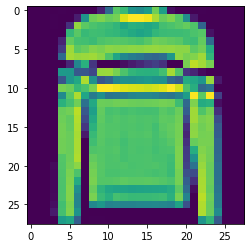

In [26]:
plt.imshow(x_train[5])

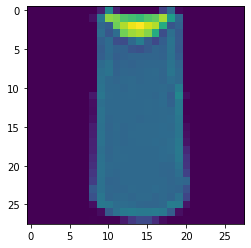

In [27]:
plt.imshow(x_train[2])

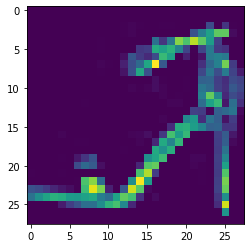

In [28]:
plt.imshow(x_train[8])

## Scaling  Normalization

In [29]:
x_train.min(), x_train.max()  # before scaling values between 0 and 255

(0, 255)

In [30]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [31]:
x_train.min(), x_train.max()  # after scaling values between 0 and 1

(0.0, 1.0)

In [32]:
# data is 2D. convolution expects height*width*color 
# here grayscale so height*weight*1

x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [33]:
# number of classes

k=len(set(y_train))
print(k)

10


## Build Model using Sequential API

In [34]:
x_train[0].shape

(28, 28, 1)

In [35]:
# Add convolution 2D
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

## Compile the Model

We use model.compile() to configure the learning process before training the model. This is where you define the type of loss function, optimizer and the metrics evaluated by the model during training and testing.

In [36]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the Model

for training the model, we need just to call its fit() method.

We will train the model with a batch_size of 64 and 10 epochs.





In [37]:
r=model.fit(x_train, y_train,batch_size=64,
         epochs=10,
         validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 89s 95ms/step - loss: 0.4111 - accuracy: 0.8514 - val_loss: 0.3034 - val_accuracy: 0.8894
Epoch 2/10
938/938 [==============================] - 89s 95ms/step - loss: 0.2559 - accuracy: 0.9060 - val_loss: 0.2619 - val_accuracy: 0.9037
Epoch 3/10
938/938 [==============================] - 89s 95ms/step - loss: 0.2139 - accuracy: 0.9207 - val_loss: 0.2467 - val_accuracy: 0.9074
Epoch 4/10
938/938 [==============================] - 89s 95ms/step - loss: 0.1819 - accuracy: 0.9311 - val_loss: 0.2525 - val_accuracy: 0.9097
Epoch 5/10
938/938 [==============================] - 89s 95ms/step - loss: 0.1544 - accuracy: 0.9431 - val_loss: 0.2412 - val_accuracy: 0.9151
Epoch 6/10
938/938 [==============================] - 89s 95ms/step - loss: 0.1289 - accuracy: 0.9516 - val_loss: 0.2410 - val_accuracy: 0.9223
Epoch 7/10
938/938 [==============================] - 89s 95ms/step - loss: 0.1046 - accuracy: 0.9606 - val_loss: 0.2521 - val_accuracy:

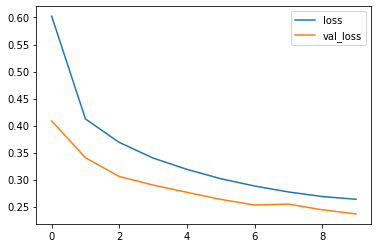

In [16]:
# plot loss per iteration

plt.plot(r.history['loss'],label ='loss')
plt.plot(r.history['val_loss'],label ='val_loss')
plt.legend()

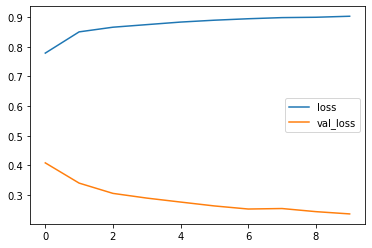

In [17]:
# plot accuracy per iteration

plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

# Test Accuracy -Evaluate the Model

In [39]:
# performannce on test sat

loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy = {accuracy*100:.2f} %")

313/313 [==============================] - 4s 13ms/step - loss: 0.3197 - accuracy: 0.9237
Accuracy = 92.37 %


# Prediction

In [40]:
# np.argmax() to select the index number which has a higher value in a row.
#or example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

pred = model.predict(x_test)
pred=np.argmax(np.round(pred),axis=1) 

In [41]:
pred.shape, y_test.shape

((10000,), (10000,))

# Visualising Prediction

Found 9224 correct labels


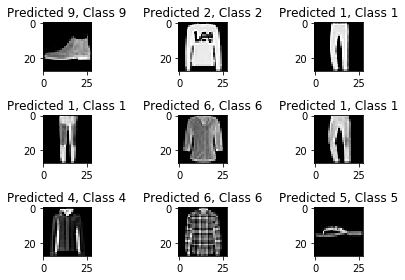

In [42]:
correct = np.where(pred==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[correct], y_test[correct]))
    plt.tight_layout()

Found 776 incorrect labels


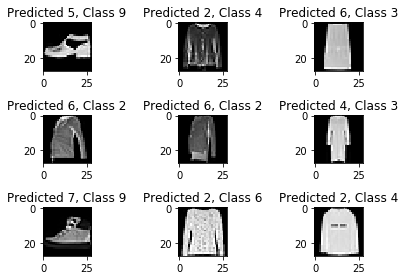

In [43]:
incorrect = np.where(pred!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(pred[incorrect], y_test[incorrect]))
    plt.tight_layout()